<a href="https://colab.research.google.com/github/butterfish13/DeepLearning/blob/main/LSTM_model_for_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
api_key = 'e8a1c8ac317244c093a922ac59019d9e'
symbol = 'BTC/USD'
interval = '5min'
order = 'asc'
start_date = '2021-10-10 00:00:00'
end_date = '2021-10-25 00:00:00'

api_url = f'https://api.twelvedata.com/time_series?symbol={symbol}&start_date={start_date}&end_date={end_date}&interval={interval}&order={order}&apikey={api_key}'

In [ ]:
data = requests.get(api_url).json()
data.keys()


dict_keys(['meta', 'values', 'status'])

In [ ]:
wk_data = pd.DataFrame(data['values'])
wk_data

,datetime,open,high,low,close
0,2021-10-10 00:00:00,54949.19141,54949.19141,54862.92969,54892.67188
1,2021-10-10 00:05:00,54843.85156,54885.78906,54824.25000,54833.17188
2,2021-10-10 00:10:00,54869.96094,54884.55859,54820.89844,54861.55859
3,2021-10-10 00:15:00,54847.17188,55018.76953,54847.17188,55018.76953
4,2021-10-10 00:20:00,55049.98047,55108.46875,55049.98047,55084.21094
...,...,...,...,...,...
4297,2021-10-24 23:40:00,60823.42188,60845.87891,60816.76953,60828.55859
4298,2021-10-24 23:45:00,60802.53906,60870.35156,60778.82812,60870.35156
4299,2021-10-24 23:50:00,60893.71875,60907.10156,60825.85156,60825.85156
4300,2021-10-24 23:55:00,60839.98828,60927.92188,60839.98828,60868.64062


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(wk_data['close'].values.reshape(-1,1))

In [ ]:
time_intervals_to_train = 24
prediction_interval = 12


x_train = []
y_train = []

In [ ]:
for i in range(time_intervals_to_train, len(scaled_data) - prediction_interval):
  x_train.append(scaled_data[i - time_intervals_to_train: i, 0])
  y_train.append(scaled_data[i + prediction_interval, 0])


x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
x_train =np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4266, 24, 1)

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences= True, input_shape = (x_train.shape[1], 1), activation= 'relu'))
model.add(Dropout(0.4))
model.add(LSTM(64, return_sequences= True, activation= 'relu'))
model.add(Dropout(0.3))
model.add(LSTM(32, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss= 'mean_squared_error', optimizer= 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size= 64)

Epoch 1/10
67/67 [==============================] - 8s 72ms/step - loss: 0.0247 - accuracy: 2.3441e-04
Epoch 2/10
67/67 [==============================] - 5s 73ms/step - loss: 0.0032 - accuracy: 2.3441e-04
Epoch 3/10
67/67 [==============================] - 5s 73ms/step - loss: 0.0028 - accuracy: 2.3441e-04
Epoch 4/10
67/67 [==============================] - 5s 72ms/step - loss: 0.0028 - accuracy: 2.3441e-04
Epoch 5/10
67/67 [==============================] - 5s 72ms/step - loss: 0.0027 - accuracy: 2.3441e-04
Epoch 6/10
67/67 [==============================] - 5s 71ms/step - loss: 0.0027 - accuracy: 2.3441e-04
Epoch 7/10
67/67 [==============================] - 5s 72ms/step - loss: 0.0026 - accuracy: 2.3441e-04
Epoch 8/10
67/67 [==============================] - 5s 72ms/step - loss: 0.0025 - accuracy: 2.3441e-04
Epoch 9/10
67/67 [==============================] - 5s 72ms/step - loss: 0.0026 - accuracy: 2.3441e-04
Epoch 10/10
67/67 [==============================] - 5s 72ms/step - loss:

In [ ]:

test_start_date = '2021-10-25 00:00:00'
test_end_date = '2021-10-28 00:00:00'

api_url = f'https://api.twelvedata.com/time_series?symbol={symbol}&start_date={test_start_date}&end_date={test_end_date}&interval={interval}&order={order}&apikey={api_key}'
test_data = requests.get(api_url).json()
ts_data = pd.DataFrame(test_data['values'])
ts_data

,datetime,open,high,low,close
0,2021-10-25 00:00:00,60854.07031,60961.19922,60776.57812,60785.30859
1,2021-10-25 00:05:00,60755.62891,60760.55078,60655.53125,60760.55078
2,2021-10-25 00:10:00,60816.41016,61116.39062,60816.41016,60983.25000
3,2021-10-25 00:15:00,61021.98047,61066.08984,60982.89844,60982.89844
4,2021-10-25 00:20:00,61002.58984,61002.58984,60858.78125,60872.30859
...,...,...,...,...,...
860,2021-10-27 23:40:00,58409.67188,58497.98828,58409.67188,58465.01172
861,2021-10-27 23:45:00,58479.87109,58573.50000,58449.12109,58543.94922
862,2021-10-27 23:50:00,58492.08984,58699.00000,58460.28906,58699.00000
863,2021-10-27 23:55:00,58695.41016,58695.41016,58409.82031,58431.16016


In [ ]:
prices = pd.to_numeric(ts_data['close'], errors='coerce').values

test_inputs = ts_data['close'].values
test_inputs = test_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(test_inputs)

In [ ]:
model_inputs.shape

(865, 1)

In [ ]:
x_test = []

for i in range(time_intervals_to_train, len(model_inputs)):
  x_test.append(model_inputs[i - time_intervals_to_train:i, 0])


x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

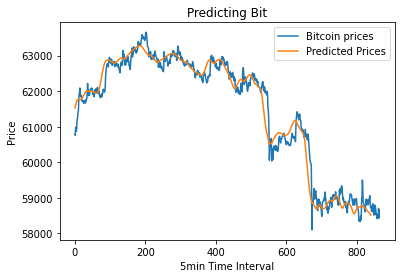

In [ ]:
plt.plot(prices, label = 'Bitcoin prices')
plt.plot(prediction_prices, label = 'Predicted Prices')
plt.title('Predicting Bit')
plt.xlabel('5min Time Interval')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
last_data = model_inputs[len(model_inputs) + 1 - time_intervals_to_train : len(model_inputs) + 1, 0]
last_data = np.array(last_data)

In [ ]:
last_data.shape

(23,)

In [ ]:
last_data = np.reshape(last_data, (1, last_data.shape[0], 1))

In [ ]:
prediction = model.predict(last_data)

In [ ]:
prediction = scaler.inverse_transform(prediction)

In [ ]:
prediction

array([[58565.367]], dtype=float32)